In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
pd.DataFrame(train_label)[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

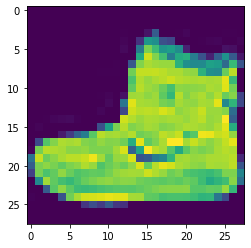

In [4]:
plt.imshow(train_image[0])

In [5]:
train_image = train_image/255
test_image = test_image/255

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#### label使用数字编码时，sparse_categorical_crossentropy

In [7]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['acc'])

In [8]:
history = model.fit(train_image,train_label,epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4832 - acc: 0.8256
Epoch 2/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3665 - acc: 0.8677
Epoch 3/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3290 - acc: 0.8789
Epoch 4/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3086 - acc: 0.8848
Epoch 5/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2900 - acc: 0.8925
Epoch 6/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2762 - acc: 0.8964
Epoch 7/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2633 - acc: 0.9010
Epoch 8/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2539 - acc: 0.9045
Epoch 9/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2422 - acc: 0.9095
Epoch 10/50
60000/60000 [==============================] - 

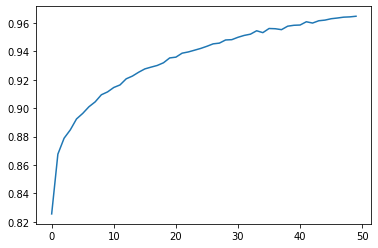

In [9]:
plt.plot(history.epoch,history.history['acc'])

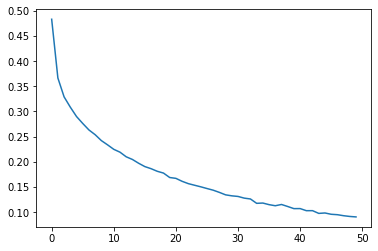

In [10]:
plt.plot(history.epoch,history.history['loss'])

In [11]:
model.evaluate(test_image,test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5780606007024646, 0.8853]

#### label 使用独热编码时 使用categorical_crossentropy

In [12]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [13]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))

In [15]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.categorical_crossentropy,
             metrics=['acc'])

In [16]:
history2 = model2.fit(train_image,train_label_onehot,epochs=25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 50us/sample - loss: 0.7798 - acc: 0.7194
Epoch 2/25
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5303 - acc: 0.8120
Epoch 3/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4837 - acc: 0.8279
Epoch 4/25
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4583 - acc: 0.8355
Epoch 5/25
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4382 - acc: 0.8438
Epoch 6/25
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4264 - acc: 0.8470
Epoch 7/25
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4141 - acc: 0.8510
Epoch 8/25
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4074 - acc: 0.8531
Epoch 9/25
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3985 - acc: 0.8576
Epoch 10/25
60000/60000 [==============================] - 

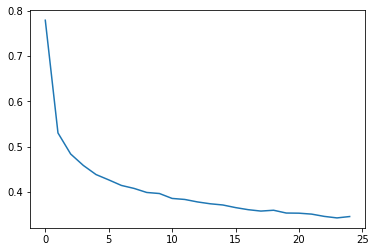

In [17]:
plt.plot(history2.epoch,history2.history['loss'])

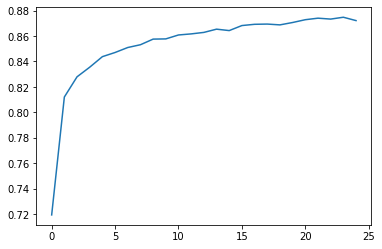

In [18]:
plt.plot(history2.epoch,history2.history['acc'])

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
________________________________________________

In [20]:
history = model2.fit(train_image,train_label_onehot,epochs=20,
                    validation_data = (test_image,test_label_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3387 - acc: 0.8766 - val_loss: 0.3506 - val_acc: 0.8757
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3398 - acc: 0.8749 - val_loss: 0.3409 - val_acc: 0.8794
Epoch 3/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3358 - acc: 0.8767 - val_loss: 0.3365 - val_acc: 0.8823
Epoch 4/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3343 - acc: 0.8780 - val_loss: 0.3375 - val_acc: 0.8828
Epoch 5/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3337 - acc: 0.8782 - val_loss: 0.3418 - val_acc: 0.8782
Epoch 6/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3315 - acc: 0.8786 - val_loss: 0.3352 - val_acc: 0.8811
Epoch 7/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3328 - acc: 0.8788 - val_loss: 0.

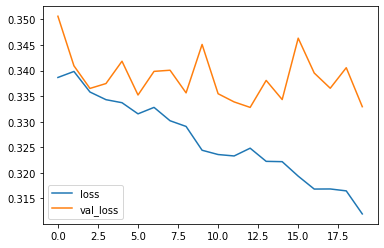

In [21]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

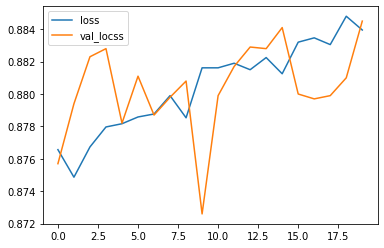

In [22]:
plt.plot(history.epoch,history.history.get('acc'),label='loss')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_locss')
plt.legend()